<a href="https://colab.research.google.com/github/sgulyano/imgvdoproc/blob/main/lab_freq_img_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab: Image Filtering in Frequency Domain

For 18-793 Image and Video Processing course. By Sarun Gulyanon.

This lab introduces image filtering in the frequency domain, an alternative and powerful way to analyze and modify images using the Fourier Transform.

So far, we have worked with images in the spatial domain, where each pixel is processed directly based on its neighboring pixels. While intuitive, spatial-domain operations can sometimes make it difficult to understand how an image's underlying structure is affected. In contrast, the frequency domain represents an image in terms of low-frequency components (smooth regions and illumination) and high-frequency components (edges, textures, and noise), making these underlying structures more explicit.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from skimage import data
%matplotlib inline

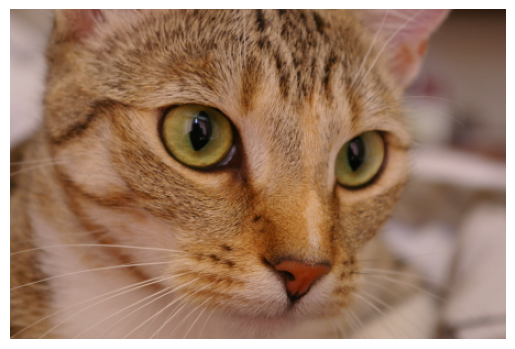

In [3]:
image = data.cat()
img = image.copy() / 255
plt.imshow(img)
plt.axis('off')
plt.show()

In [4]:
def gaussian_kernel(size, sigma=1):
    n = size//2
    xx, yy = np.meshgrid(range(-n,n+1), range(-n,n+1))
    kernel = np.exp(- (xx**2 + yy**2) / (2*sigma**2))
    kernel = kernel / kernel.sum()
    return kernel

In [5]:
def gaussian_blur_fft(image, kernel_size=5, sigma=1):
    """
    Perform Gaussian blur on the image using FFT
    Input:  image = the original image to perform Gaussian blur on
            kernel_size = size of the Gaussian kernel
            sigma = sigma of the Gaussian function
    Output: Image after applied the Gaussian blur using FFT
            Gaussian kernel in the frequency domain
            Image in the frequency domain
            Convolved image in the frequency domain
    """
    kernel = gaussian_kernel(kernel_size, sigma)

    kernel_row, kernel_col = kernel.shape

    pad_height = kernel_row // 2
    pad_width = kernel_col // 2

    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width), (0, 0)), 'edge')

    kernel_fft = np.fft.fft2(kernel, s=padded_image.shape[:2], axes=(0, 1))

    image_fft = np.fft.fft2(padded_image, axes=(0, 1))

    convolved_fft = kernel_fft[:, :, np.newaxis] * image_fft
    convolved_image = np.fft.ifft2(convolved_fft, axes=(0, 1)).real
    convolved_image = np.clip(convolved_image, 0, 1)
    return convolved_image[pad_height:-pad_height, pad_width:-pad_width], kernel_fft, image_fft, convolved_fft

In [7]:
kernel_size = 13
sigma = 3

img_blur, kernel_fft, image_fft, convolved_fft = gaussian_blur_fft(img, kernel_size, sigma)

image_fft_shift = np.log( abs(np.fft.fftshift(image_fft).real) + 1)
kernel_fft_shift = np.fft.fftshift(kernel_fft)
convolved_fft_shift = np.log( abs(np.fft.fftshift(convolved_fft).real) + 1)

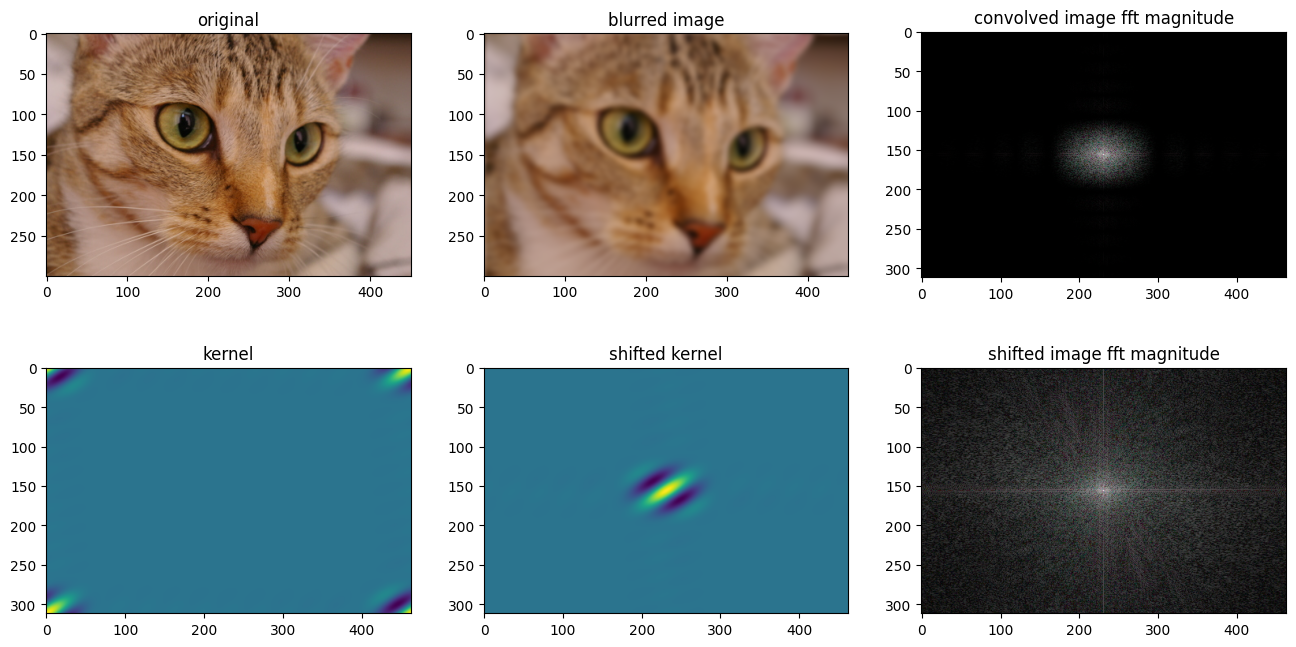

In [15]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.imshow(img)
plt.title('original')
plt.subplot(2,3,2)
plt.imshow(img_blur)
plt.title('blurred image')

plt.subplot(2,3,4)
plt.imshow(kernel_fft.real)
plt.title('kernel')
plt.subplot(2,3,5)
plt.imshow(kernel_fft_shift.real)
plt.title('shifted kernel')
plt.subplot(2,3,6)
plt.imshow(image_fft_shift / image_fft_shift.max())
plt.title('shifted image fft magnitude')
plt.subplot(2,3,3)
plt.imshow(convolved_fft_shift / convolved_fft_shift.max())
plt.title('convolved image fft magnitude')
plt.show()

----